This notebook contains a simple analysis of [Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance)

In [1]:
import numpy as np, pandas as pd, os, time, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings("ignore")
color = sns.color_palette()

insurance = pd.read_csv("../input/insurance.csv")

## General Info of the Dataset

In [2]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Distribution of Target Variable (Charges)

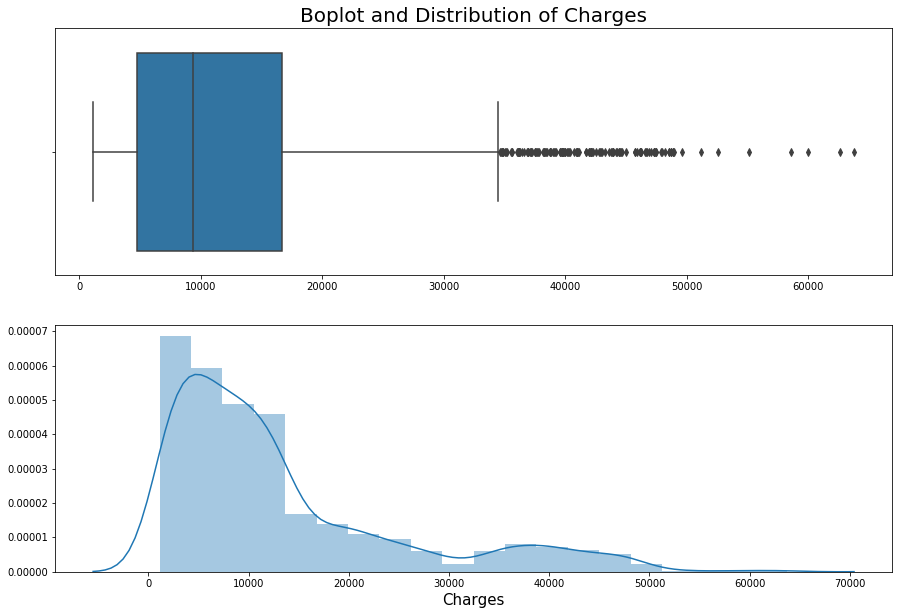

In [5]:
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
sns.boxplot(insurance["charges"], ax = ax[0])
sns.distplot(insurance["charges"], bins = 20, kde = True, ax = ax[1])
ax[0].set_title("Boplot and Distribution of Charges", fontsize = 20)
ax[0].set_xlabel("")
ax[1].set_xlabel("Charges", fontsize = 15)
plt.show()

## Features v.s. Target

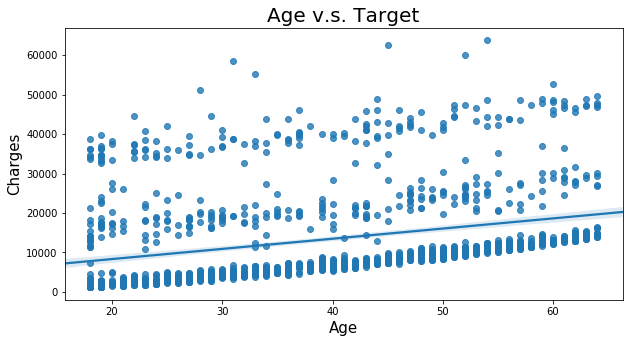

In [6]:
plt.figure(figsize = (10, 5))
sns.regplot(insurance["age"], insurance["charges"], color = color[0])
plt.title("Age v.s. Target", fontsize = 20)
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Charges", fontsize = 15)
plt.show()

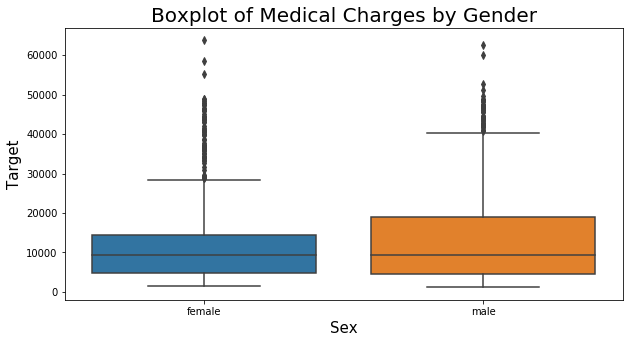

In [7]:
plt.figure(figsize = (10, 5))
sns.boxplot(insurance["sex"], insurance["charges"])
plt.title("Boxplot of Medical Charges by Gender", fontsize = 20)
plt.xlabel("Sex", fontsize = 15)
plt.ylabel("Target", fontsize = 15)
plt.show()

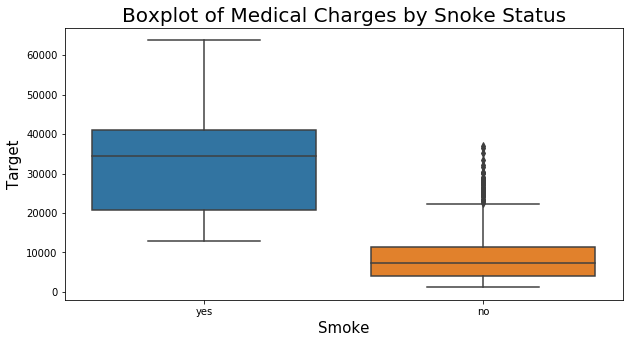

In [8]:
plt.figure(figsize = (10, 5))
sns.boxplot(insurance["smoker"], insurance["charges"])
plt.title("Boxplot of Medical Charges by Snoke Status", fontsize = 20)
plt.xlabel("Smoke", fontsize = 15)
plt.ylabel("Target", fontsize = 15)
plt.show()

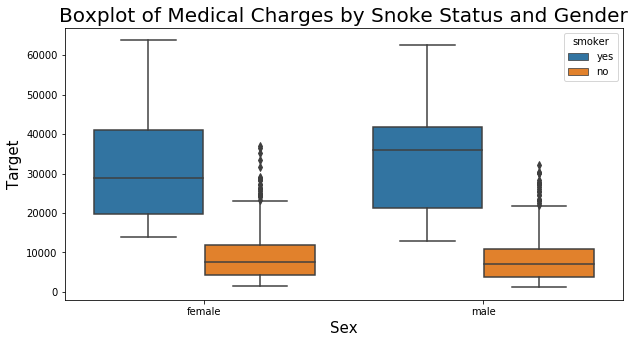

In [9]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = "sex", y = "charges", hue = "smoker", data = insurance)
plt.title("Boxplot of Medical Charges by Snoke Status and Gender", fontsize = 20)
plt.xlabel("Sex", fontsize = 15)
plt.ylabel("Target", fontsize = 15)
plt.show()

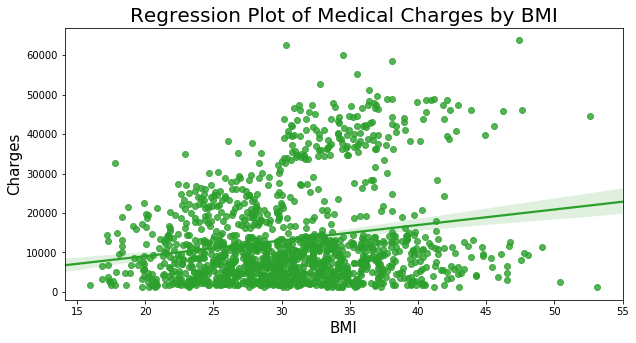

In [10]:
plt.figure(figsize = (10, 5))
sns.regplot(insurance["bmi"], insurance["charges"], color = color[2])
plt.title("Regression Plot of Medical Charges by BMI", fontsize = 20)
plt.xlabel("BMI", fontsize = 15)
plt.ylabel("Charges", fontsize = 15)
plt.show()

Need to do feature engeering to classify Obesity status

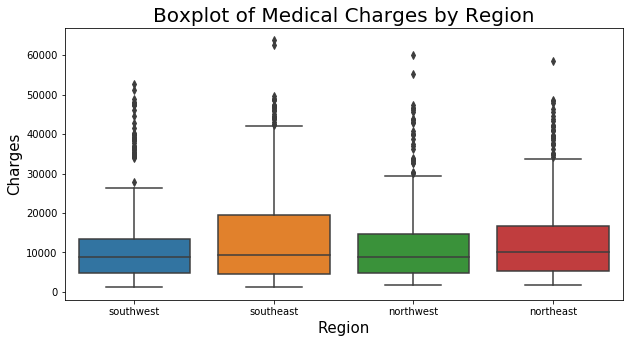

In [11]:
plt.figure(figsize = (10, 5))
sns.boxplot(insurance["region"], insurance["charges"])
plt.title("Boxplot of Medical Charges by Region", fontsize = 20)
plt.xlabel("Region", fontsize = 15)
plt.ylabel("Charges", fontsize = 15)
plt.show()

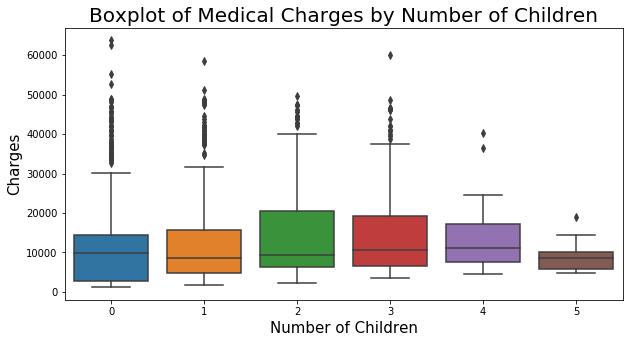

In [12]:
plt.figure(figsize = (10, 5))
sns.boxplot(insurance["children"], insurance["charges"])
plt.title("Boxplot of Medical Charges by Number of Children", fontsize = 20)
plt.xlabel("Number of Children", fontsize = 15)
plt.ylabel("Charges", fontsize = 15)
plt.show()

## Features Engineering

### Obesity Status of Clients

In [13]:
insurance["obesity"] = "No"
insurance["obesity"].loc[insurance["bmi"] >= 30] = "Yes"

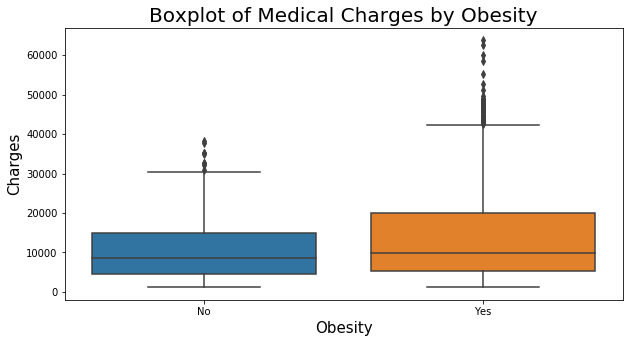

In [14]:
plt.figure(figsize = (10, 5))
sns.boxplot(insurance["obesity"], insurance["charges"])
plt.title("Boxplot of Medical Charges by Obesity", fontsize = 20)
plt.xlabel("Obesity", fontsize = 15)
plt.ylabel("Charges", fontsize = 15)
plt.show()

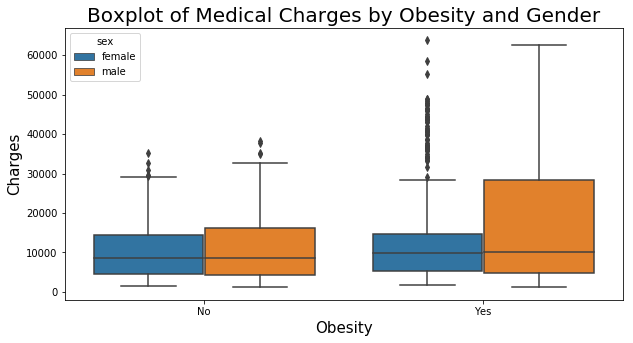

In [15]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = "obesity", y = "charges", hue = "sex", data = insurance)
plt.title("Boxplot of Medical Charges by Obesity and Gender", fontsize = 20)
plt.xlabel("Obesity", fontsize = 15)
plt.ylabel("Charges", fontsize = 15)
plt.show()

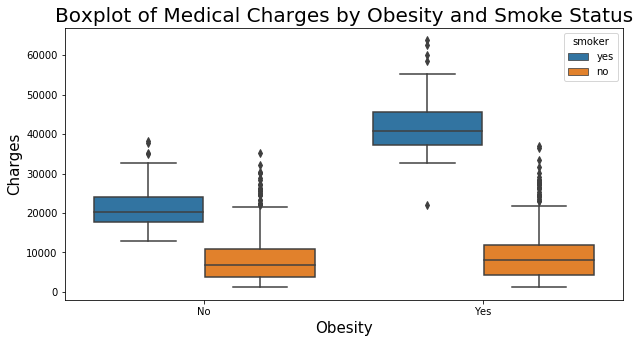

In [16]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = "obesity", y = "charges", hue = "smoker", data = insurance)
plt.title("Boxplot of Medical Charges by Obesity and Smoke Status", fontsize = 20)
plt.xlabel("Obesity", fontsize = 15)
plt.ylabel("Charges", fontsize = 15)
plt.show()

## Extra Analysis

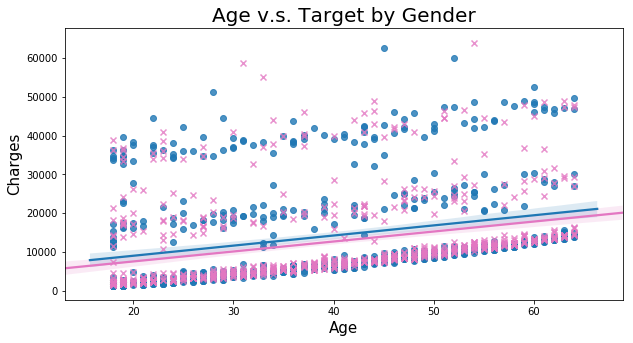

In [17]:
plt.figure(figsize = (10, 5))
sns.regplot(insurance["age"].loc[insurance["sex"] == "male"], 
            insurance["charges"].loc[insurance["sex"] == "male"])
sns.regplot(insurance["age"].loc[insurance["sex"] == "female"], 
            insurance["charges"].loc[insurance["sex"] == "female"], 
            marker = "x", color = color[6])
plt.title("Age v.s. Target by Gender", fontsize = 20)
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Charges", fontsize = 15)
plt.show()

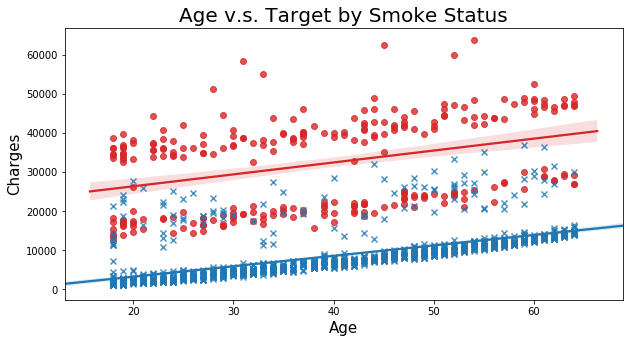

In [18]:
plt.figure(figsize = (10, 5))
sns.regplot(insurance["age"].loc[insurance["smoker"] == "yes"], 
            insurance["charges"].loc[insurance["smoker"] == "yes"], 
            color = color[3])
sns.regplot(insurance["age"].loc[insurance["smoker"] == "no"], 
            insurance["charges"].loc[insurance["smoker"] == "no"], 
            marker = "x", color = color[0])
plt.title("Age v.s. Target by Smoke Status", fontsize = 20)
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Charges", fontsize = 15)
plt.show()

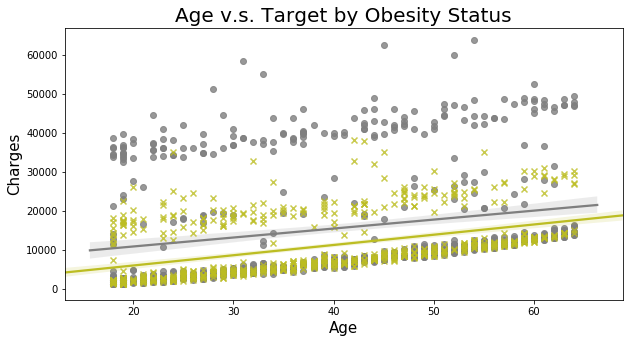

In [19]:
plt.figure(figsize = (10, 5))
sns.regplot(insurance["age"].loc[insurance["obesity"] == "Yes"], 
            insurance["charges"].loc[insurance["obesity"] == "Yes"], 
            color = color[7])
sns.regplot(insurance["age"].loc[insurance["obesity"] == "No"], 
            insurance["charges"].loc[insurance["obesity"] == "No"], 
            marker = "x", color = color[8])
plt.title("Age v.s. Target by Obesity Status", fontsize = 20)
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Charges", fontsize = 15)
plt.show()

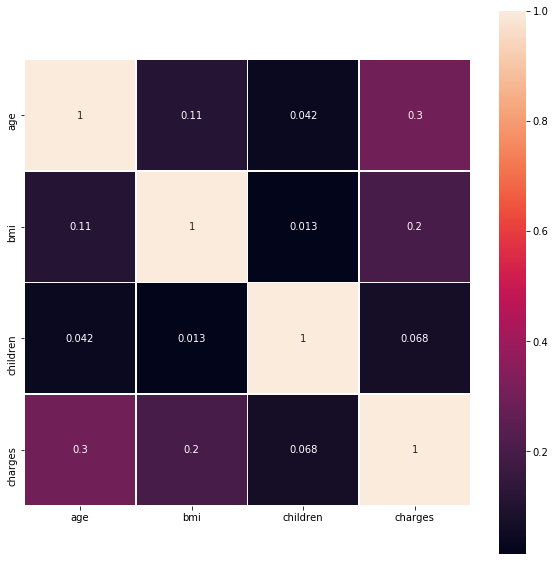

In [20]:
plt.figure(figsize = (10, 10))
sns.heatmap(insurance.corr(), annot = True, square = True, linewidth = 0.5)
plt.show()

### Conclusion:
* Don't smoke
* Don't get too fat